In [92]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [93]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
from datetime import datetime

In [95]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [96]:
%matplotlib inline

In [97]:
# assert np.any([[6,2]])

In [98]:
# Files to use 
filenamePrice='LZ_GPA_DERI_AdjustedPriceForward_20.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu='LZ_GPA_INDU_ZX.csv'
filenameFCAP='LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor='LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'

In [190]:
# Factors
# Value factor
filenamePE='LZ_GPA_VAL_PE.csv'  # 市盈率
filenamePB='LZ_GPA_VAL_PB.csv'  # 市净率
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%)
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%)
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%)
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%)
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动
filenameABNORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv'# 偏度

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'      # 三月换手率均值
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'                   # 非流动性因子
filenameVOLUME = 'LZ_GPA_QUOTE_TVOLUME.csv'               # 成交量

In [100]:
# Constants
path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HSIndex='000300.SH'

In [191]:
# Several dictionaries for different sorts of factors 
filenameDictValue = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF}
filenameDictGrowth = {'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT,'YOYOCF':filenameYOYOCF, 'YOYROE':filenameYOYROE, 'YOYBPS':filenameYOYBPS}
filenameDicFinance = {'CAPITALIZEDTODA':filenameCAPITALIZEDTODA, 'CASHRATIO':filenameCASHRATIO, 'CASHTOLIQDEBT':filenameCASHTOLIQDEBT,\
                     'OCFTODEBT':filenameOCFTODEBT,'PROFITTOOP':filenamePROFITTOOP}
filenameDictMomentum = {'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'MOM3M':filenameMOM3M,'PVO':filenamePVO, 'RV1Y':filenameRV1Y,\
                       'ABORMALVOLUME':filenameABNORMALVOLUME,'SKEW':filenameSKEW}
filenameDictLiq = {'TURNOVER_1M':filenameTURNOVER1M, 'AMOUNTAVG1M':filenameAMOUNTAVG1M, 'ILLIQ':filenameILLIQ,'VOLUME':filenameVOLUME}

In [192]:
filenameTest = {'PB':filenamePB, 'YOYBPS':filenameYOYBPS,'ILLIQ':filenameILLIQ,'TURNOVER_1M':filenameTURNOVER1M,\
                'PROFITTOOP':filenamePROFITTOOP,'MOM_1M':filenameMOM1M,'VOLUME':filenameVOLUME}

In [247]:
filenameDict = filenameDictValue 

In [248]:
# total filename dictionary
#filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
#                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'MOM3M':filenameMOM3M, 'TURNOVER_1M':filenameTURNOVER1M }

In [249]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]

In [250]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5][HSIndex]

In [251]:
LFCAPDF = np.log(ff.getData(filenameFCAP, timeStampNum, thresholdNum))

In [252]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [253]:
map(lambda x: x.date().strftime("%Y%m%d"), endOfMonthList)

['20061229',
 '20070131',
 '20070228',
 '20070330',
 '20070430',
 '20070531',
 '20070629',
 '20070731',
 '20070831',
 '20070928',
 '20071031',
 '20071130',
 '20071228',
 '20080131',
 '20080229',
 '20080331',
 '20080430',
 '20080530',
 '20080630',
 '20080731',
 '20080829',
 '20080926',
 '20081031',
 '20081128',
 '20081231',
 '20090123',
 '20090227',
 '20090331',
 '20090430',
 '20090527',
 '20090630',
 '20090731',
 '20090831',
 '20090930',
 '20091030',
 '20091130',
 '20091231',
 '20100129',
 '20100226',
 '20100331',
 '20100430',
 '20100531',
 '20100630',
 '20100730',
 '20100831',
 '20100930',
 '20101029',
 '20101130',
 '20101231',
 '20110131',
 '20110228',
 '20110331',
 '20110429',
 '20110531',
 '20110630',
 '20110729',
 '20110831',
 '20110930',
 '20111031',
 '20111130',
 '20111230',
 '20120131',
 '20120229',
 '20120330',
 '20120427',
 '20120531',
 '20120629',
 '20120731',
 '20120831',
 '20120928',
 '20121031',
 '20121130',
 '20121231',
 '20130131',
 '20130228',
 '20130329',
 '20130426',

In [254]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [255]:
IndustryDF = pd.read_csv(path+filenameIndu,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[endOfMonthList]

In [256]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2006-12-29 00:00:00 307
2007-01-31 00:00:00 277
2007-02-28 00:00:00 288
2007-03-30 00:00:00 269
2007-04-30 00:00:00 339
2007-05-31 00:00:00 303
2007-06-29 00:00:00 324
2007-07-31 00:00:00 281
2007-08-31 00:00:00 299
2007-09-28 00:00:00 317
2007-10-31 00:00:00 308
2007-11-30 00:00:00 301
2007-12-28 00:00:00 324
2008-01-31 00:00:00 316
2008-02-29 00:00:00 315
2008-03-31 00:00:00 299
2008-04-30 00:00:00 296
2008-05-30 00:00:00 308
2008-06-30 00:00:00 319
2008-07-31 00:00:00 270
2008-08-29 00:00:00 241
2008-09-26 00:00:00 259
2008-10-31 00:00:00 230
2008-11-28 00:00:00 253
2008-12-31 00:00:00 230
2009-01-23 00:00:00 211
2009-02-27 00:00:00 218
2009-03-31 00:00:00 227
2009-04-30 00:00:00 249
2009-05-27 00:00:00 237
2009-06-30 00:00:00 257
2009-07-31 00:00:00 240
2009-08-31 00:00:00 257
2009-09-30 00:00:00 250
2009-10-30 00:00:00 281
2009-11-30 00:00:00 288
2009-12-31 00:00:00 317
2010-01-29 00:00:00 296
2010-02-26 00:00:00 331
2010-03-31 00:00:00 340
2010-04-30 00:00:00 342
2010-05-31 00:00

In [257]:
normalizedLFCAP = ff.winsorAndnorm(LFCAPDF, filterdict, endOfMonthList)

In [258]:
# Creat new dataframe to save the outcome
global returnofFactor
global tValueofFactor
global pValueofFactor
global ICFactor
returnofFactor = pd.DataFrame(index=endOfMonthList[:-1],columns=[filenameDict.keys()],data=None) 
tValueofFactor = pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None)
pValueofFactor = pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None)
ICFactor =  pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None)

In [259]:
#  ---------All above are global variables --------

In [260]:
for i,j in filenameDict.iteritems():
    factorData = ff.getData(j, timeStampNum, thresholdNum)
    normalizedData = ff.winsorAndnorm(factorData, filterdict, endOfMonthList)
    neutralizedData = ff.neutralizeFactor(normalizedData, normalizedLFCAP,IndustryDF,endOfMonthList)
    ff.calReturnAndIC(returnofFactor,tValueofFactor,pValueofFactor,ICFactor,neutralizedData,activeReturnData,i)

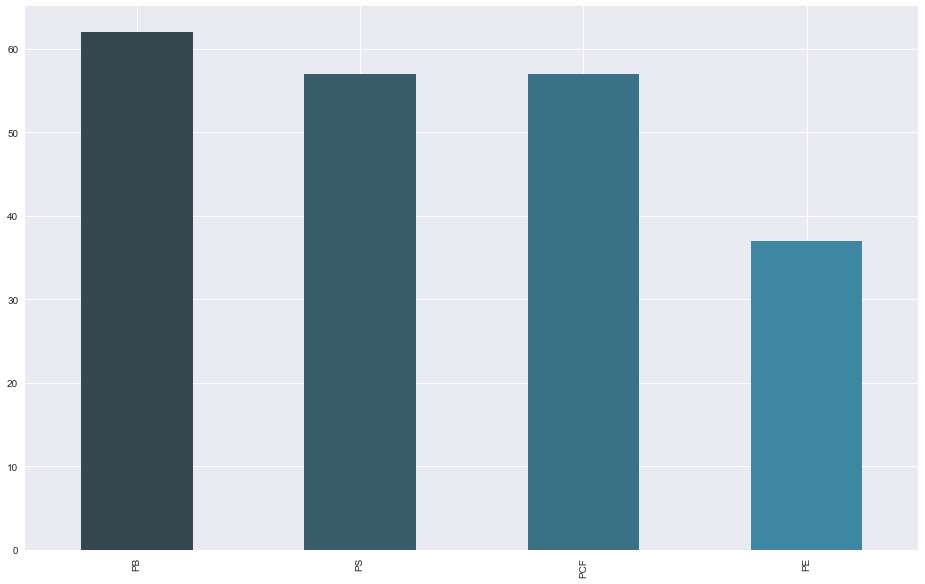

In [261]:
ICFactor[np.abs(ICFactor)>np.abs(ICFactor).mean().mean()].count().plot(figsize=(16,10),kind='bar',color=sns.color_palette("GnBu_d",10))

In [262]:
ICFactor.astype(float).describe()

,PB,PS,PCF,PE
count,123.000000,123.000000,123.000000,123.000000
mean,-0.058464,-0.052560,-0.035272,-0.033767
std,0.089989,0.086504,0.086838,0.067961
min,-0.274306,-0.254706,-0.240537,-0.214637
25%,-0.132244,-0.111781,-0.100357,-0.075797
50%,-0.064029,-0.055658,-0.033479,-0.033486
75%,0.000369,0.012814,0.029491,0.003440
max,0.188111,0.191464,0.172945,0.180906


In [263]:
ICFactor.loc[:,ICFactor.iloc[-1] == ICFactor.mean()].shape[1]

0

In [264]:
ICFactor.iloc[-1] > ICFactor.mean()

PB      True
PS      True
PCF     True
PE     False
dtype: bool

In [265]:
turnOver = pd.read_csv(path+filenameTURNOVER1M,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
illq = pd.read_csv(path+filenameRV1Y,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
correlationDF = ff.showCorrelation(turnOver,illq, endOfMonthList, filterdic = None).astype(float)
correlationDF.describe()

,Pearson,Spearman
count,124.000000,124.000000
mean,0.150249,0.226455
std,0.116881,0.115405
min,-0.307875,-0.068493
25%,0.071719,0.178833
50%,0.140068,0.235671
75%,0.239630,0.301806
max,0.384335,0.447515


In [266]:
ICFactorTosave = ICFactor.apply(lambda x : x/np.abs(x).sum(),axis=1).shift(1)
#ICFactorTosave.to_csv((path+'ICfactorWeight.csv'))

In [267]:
returnofFactor.cumsum().tail()

,PB,PS,PCF,PE
2016-10-31,-0.332998,-0.146053,-0.112762,-0.0492848
2016-11-30,-0.331199,-0.148644,-0.11545,-0.0455486
2016-12-30,-0.339459,-0.15157,-0.1183,-0.0466158
2017-01-26,-0.343186,-0.158028,-0.121699,-0.048486
2017-02-28,-0.347139,-0.157764,-0.124327,-0.0539617


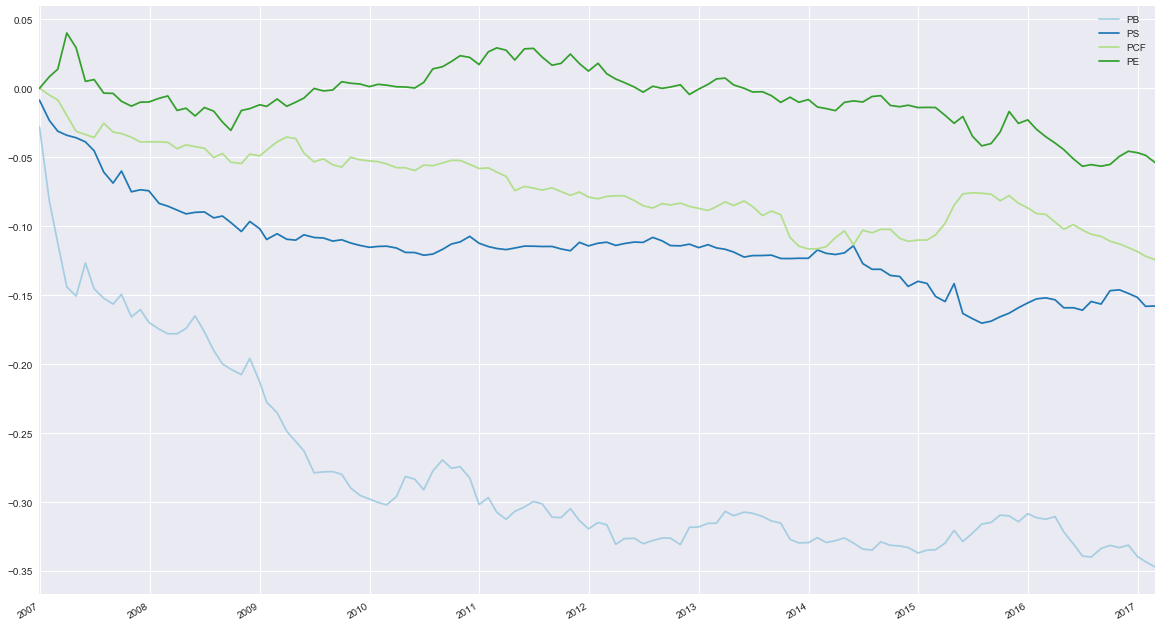

In [268]:
returnofFactor.cumsum().plot(figsize=(20,12),color=sns.color_palette("Paired",10))

In [269]:
returnofFactor.astype(float).describe()

,PB,PS,PCF,PE
count,123.000000,123.000000,123.000000,123.000000
mean,-0.002822,-0.001283,-0.001011,-0.000439
std,0.009577,0.004837,0.004483,0.006005
min,-0.053927,-0.021690,-0.016469,-0.024410
25%,-0.006769,-0.002940,-0.003267,-0.004824
50%,-0.001784,-0.000879,-0.001343,-0.000557
75%,0.002267,0.001132,0.001543,0.002873
max,0.023961,0.013041,0.013159,0.026234


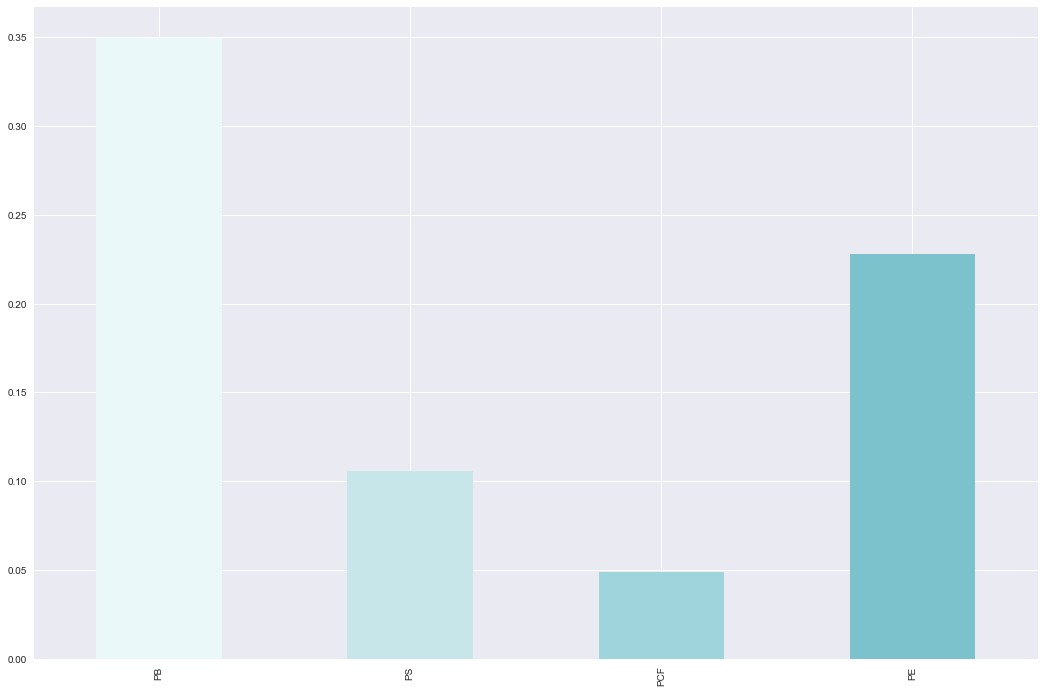

In [275]:
color_set=sns.light_palette((210, 90, 60), input="husl")
(pValueofFactor[pValueofFactor<0.05].count()/len(pValueofFactor)).plot(figsize=(18,12),kind='bar',color=sns.color_palette(color_set,10))

In [271]:
ReturnForPlot = returnofFactor.copy()
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month<12 else\
                                             100*(x.year+1)+1)

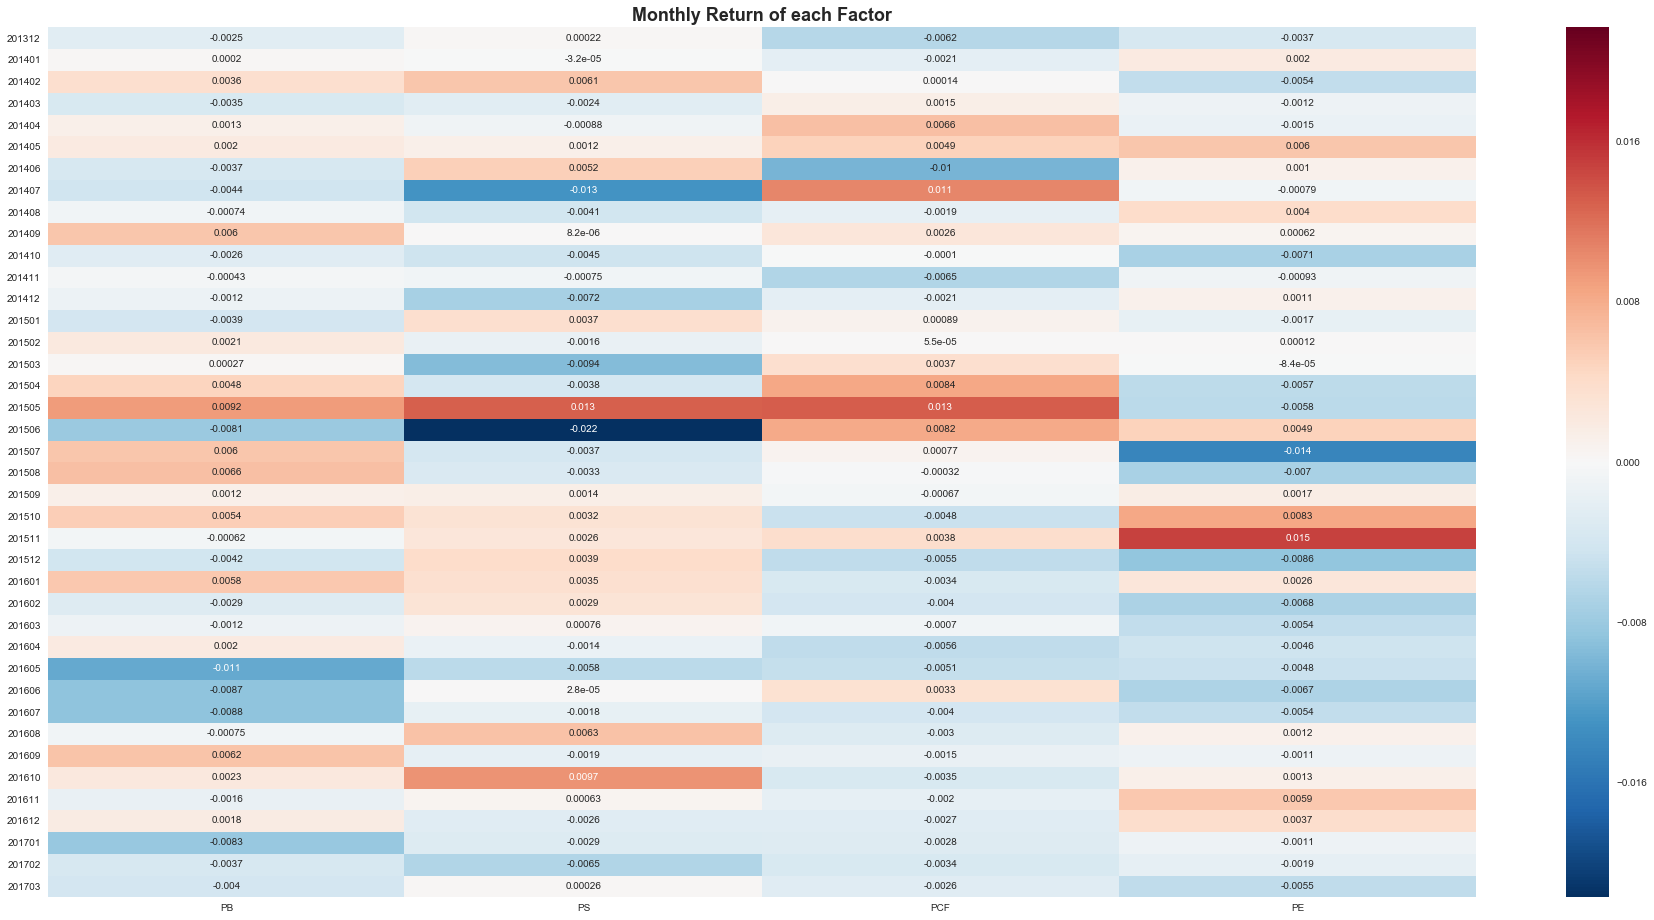

In [272]:
ReturnForPlot = ReturnForPlot.astype(float)

plt.figure(figsize=(32,16))
ax = plt.axes()
sns.heatmap(ReturnForPlot[-40:],ax=ax, annot=True)
ax.set_title('Monthly Return of each Factor',fontsize=18, fontweight='bold')
plt.show()